## Visualize data

In [2]:
from data_generator import vis_train_features, plot_raw_audio
from IPython.display import Markdown, display, Audio

There are 12117 total training examples.


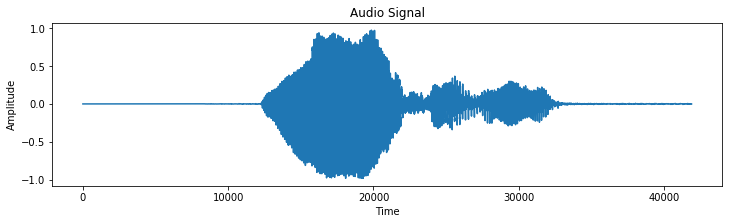

**Shape Audio signal** : (41895,)

**Transcript** : mười sáu

In [5]:
# extract label, audio features for a training sample
text, raw_audio, mfcc_feature, spectrogram_feature, audio_path = vis_train_features(index = 2)
plot_raw_audio(raw_audio)
display(Markdown('**Shape Audio signal** : ' + str(raw_audio.shape)))
display(Markdown('**Transcript** : ' + str(text)))
Audio(audio_path)

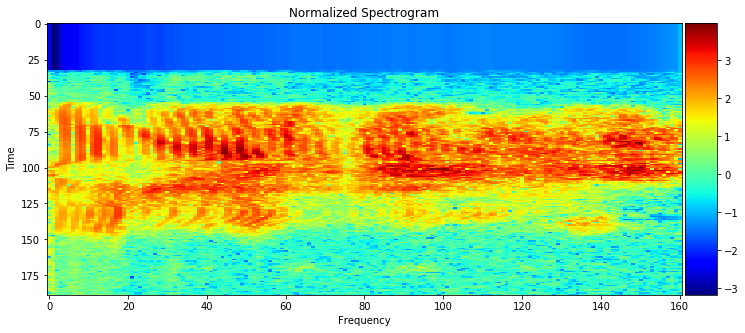

**Shape Spectrogram** : (189, 161)

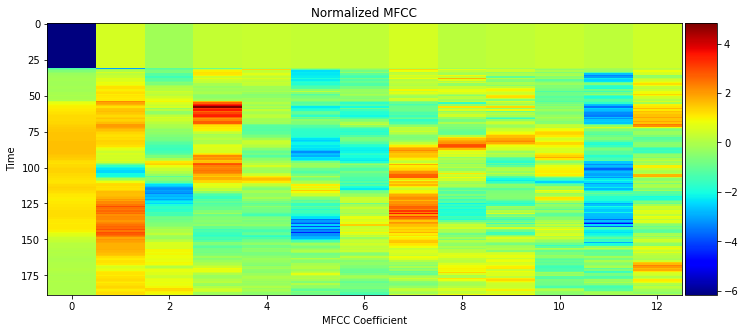

**Shape MFCC** : (189, 13)

In [6]:
from data_generator import plot_spectrogram_feature, plot_mfcc_feature

# plot normalized spectrogram 
plot_spectrogram_feature(spectrogram_feature)
display(Markdown('**Shape Spectrogram** : ' + str(spectrogram_feature.shape)))

# plot normalized mfcc
plot_mfcc_feature(mfcc_feature)
display(Markdown('**Shape MFCC** : ' + str(mfcc_feature.shape)))

## TRAINING MODEL

In [9]:
from models import *
from train_utils import train_model
from keras.backend.tensorflow_backend import set_session
import tensorflow as tf

In [10]:
config = tf.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0
set_session(tf.Session(config=config))

In [11]:
model = my_models(input_dim=13, filters=512, kernel_size=5, strides=1, units_birnn=1280, 
                  units_fc=1024, conv_border_mode='same', output_dim=94)

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
the_input (InputLayer)       (None, None, 13)          0         
_________________________________________________________________
BN_1 (BatchNormalization)    (None, None, 13)          52        
_________________________________________________________________
Conv1D_1 (Conv1D)            (None, None, 512)         33792     
_________________________________________________________________
Conv1D_2 (Conv1D)            (None, None, 512)         1311232   
_________________________________________________________________
BN_2 (BatchNormalization)    (None, None, 512)         2048      
_________________________________________________________________
bidirectional_1 (Bidirection (None, None, 1280)        4590080   
_________________________________________________________________
bidirectional_2 (Bidirection (None, None, 1280)        6556

In [ ]:
train_model(input_to_softmax=model, 
            train_json='train_corpus.json', 
            valid_json='valid_corpus.json', 
            pickle_path='mmodel.pickle', 
            save_model_path='mmodel.h5', 
            spectrogram=False, 
            epochs=100)

## Visualize loss train and valid

In [13]:
from glob import glob
import numpy as np
import _pickle as pickle
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style(style='white')

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


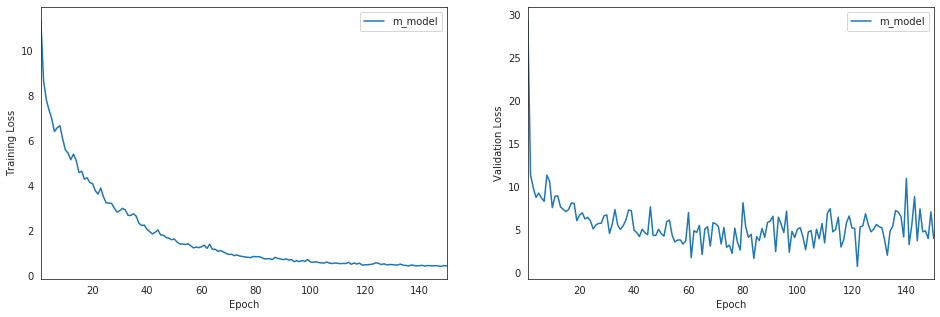

In [14]:
all_pickles = sorted(glob("results/*.pickle"))
# extract the name of each model
model_names = [item[8:-7] for item in all_pickles]
# extract the loss history for each model
valid_loss = [pickle.load( open( i, "rb" ) )['val_loss'] for i in all_pickles]
train_loss = [pickle.load( open( i, "rb" ) )['loss'] for i in all_pickles]
# save the number of epochs used to train each model
num_epochs = [len(valid_loss[i]) for i in range(len(valid_loss))]

fig = plt.figure(figsize=(16,5))

# plot the training loss vs. epoch for each model
ax1 = fig.add_subplot(121)
for i in range(len(all_pickles)):
    ax1.plot(np.linspace(1, num_epochs[i], num_epochs[i]), 
            train_loss[i], label=model_names[i])
# clean up the plot
ax1.legend()  
ax1.set_xlim([1, max(num_epochs)])
plt.xlabel('Epoch')
plt.ylabel('Training Loss')

# plot the validation loss vs. epoch for each model
ax2 = fig.add_subplot(122)
for i in range(len(all_pickles)):
    ax2.plot(np.linspace(1, num_epochs[i], num_epochs[i]), 
            valid_loss[i], label=model_names[i])
# clean up the plot
ax2.legend()  
ax2.set_xlim([1, max(num_epochs)])
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.show()

## Prediction